# HR Analytics
Working with a [HR Analytics data set from Kaggle](https://www.kaggle.com/datasets/anshika2301/hr-analytics-dataset/discussion/456134).

## Data Exploration

### 1. Import Statements

In [1]:
# data analysis packages
import pandas as pd
import numpy as np

# data visualisation packages
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning packages
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.pipeline import make_pipeline

### 2. Load and View Data

In [2]:
df = pd.read_csv('data/HR_Analytics.csv')
pd.set_option('display.max_columns', None) # show all columns rather than truncating
df.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,1,405,3,Male,54,3,1,Laboratory Technician,3,Single,1420,Upto 5k,25233,1,Y,No,13,3,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,1,411,4,Female,69,2,1,Sales Representative,3,Single,1200,Upto 5k,9724,1,Y,No,12,3,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,1,614,2,Male,69,3,1,Sales Representative,2,Single,1878,Upto 5k,8059,1,Y,Yes,14,3,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,1,1012,2,Male,73,3,1,Research Scientist,4,Single,1051,Upto 5k,13493,1,Y,No,15,3,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,1,1156,3,Male,80,3,1,Laboratory Technician,3,Single,1904,Upto 5k,13556,1,Y,No,12,3,4,80,0,0,0,3,0,0,0,0.0


In [3]:
pd.set_option('display.max_columns', None) # show all columns rather than truncating
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1480.000000,1480.000000,1480.000000,1480.000000,1480.0,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.0,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1423.000000
mean,36.917568,801.384459,9.220270,2.910811,1.0,1031.860811,2.724324,65.845270,2.729730,2.064865,2.725000,6504.985811,14298.460811,2.687162,15.210135,3.153378,2.708784,80.0,0.791892,11.281757,2.797973,2.760811,7.009459,4.228378,2.182432,4.118060
std,9.128559,403.126988,8.131201,1.023796,0.0,605.955046,1.092579,20.328266,0.713007,1.105574,1.104137,4700.261400,7112.056802,2.494098,3.655338,0.360474,1.081995,0.0,0.850527,7.770870,1.288791,0.707024,6.117945,3.616020,3.219357,3.555484
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,493.750000,2.000000,48.000000,2.000000,1.000000,2.000000,2922.250000,8051.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,800.000000,7.000000,3.000000,1.0,1027.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4933.000000,14220.000000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1568.250000,4.000000,83.000000,3.000000,3.000000,4.000000,8383.750000,20460.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


These views of the data reveal the following points that I'd like to look into further

**a.** The field `YearsWithCurrManager` appears to have null values

**b.** I want to check the granularity of the data, and ensure that the two ID fields are unique.

**c.** The following fields all appear to be on a 1-5 scale, where we can't assume to know which end of the scale is positive, and which is negative.

- Education
- Environmental Satisfaction
- Job Involvement
- Job Level
- Job Satisfaction
- Performance Rating
- Relationship Satisfaction
- Worklife Balance

We might be able to infer the direction of some of these scales by looking for correlations with other fields

### 3. Understanding/Cleansing the data

**a.** Investigating `YearsWithCurrManager` values



In [4]:
df['YearsWithCurrManager'].isnull().sum()

57

57 missing values implies that this field is not going to be reliable to use in any model, so I'm going to drop this field now to avoid skewing my model at a later stage.  I'll need to use more reliable features in my predictions.

I'm also dropping `StandardHours` as there is no variance at all in this field; and `Over18`, as the minimum age in the dataset is 18

In [5]:
df = df.drop(['YearsWithCurrManager','StandardHours','Over18'], axis=1) # dropping columns
df.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,SalarySlab,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,1,405,3,Male,54,3,1,Laboratory Technician,3,Single,1420,Upto 5k,25233,1,No,13,3,3,0,0,2,3,0,0,0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,1,411,4,Female,69,2,1,Sales Representative,3,Single,1200,Upto 5k,9724,1,No,12,3,1,0,0,2,3,0,0,0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,1,614,2,Male,69,3,1,Sales Representative,2,Single,1878,Upto 5k,8059,1,Yes,14,3,4,0,0,3,3,0,0,0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,1,1012,2,Male,73,3,1,Research Scientist,4,Single,1051,Upto 5k,13493,1,No,15,3,4,0,0,2,3,0,0,0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,1,1156,3,Male,80,3,1,Laboratory Technician,3,Single,1904,Upto 5k,13556,1,No,12,3,4,0,0,0,3,0,0,0


**b.** Investigating `EmpID` and `EmployeeNumber`

In [6]:
# counting the occurrence of values in EmpID and EmployeeNumber
EmpIDs = df['EmpID'].value_counts()
EmployeeNumbers = df['EmployeeNumber'].value_counts()

print('The data set contains %s unique employee IDs and %s unique employee numbers' % (len(EmpIDs), len(EmployeeNumbers)))

The data set contains 1470 unique employee IDs and 1470 unique employee numbers


There are 1480 rows in the complete data set, so I just want to check the data for the 10 rows that differ to see if they are a duplication or if they represent a change in state in the data

In [7]:
# checking to see if any of the 10 rows could be duplicates
df.duplicated().value_counts()

False    1470
True       10
Name: count, dtype: int64

Now that we know these are all duplicates we can confidently drop them

In [8]:
df.drop_duplicates(inplace=True)

**c.** Getting a firm grip on the direction of the numerical scales for the previously listed fields

Given that `Attrition` - the focus of our analysis - is a categorical field, though, it would first be worth a quick glance at the different categories in each non-numerical field

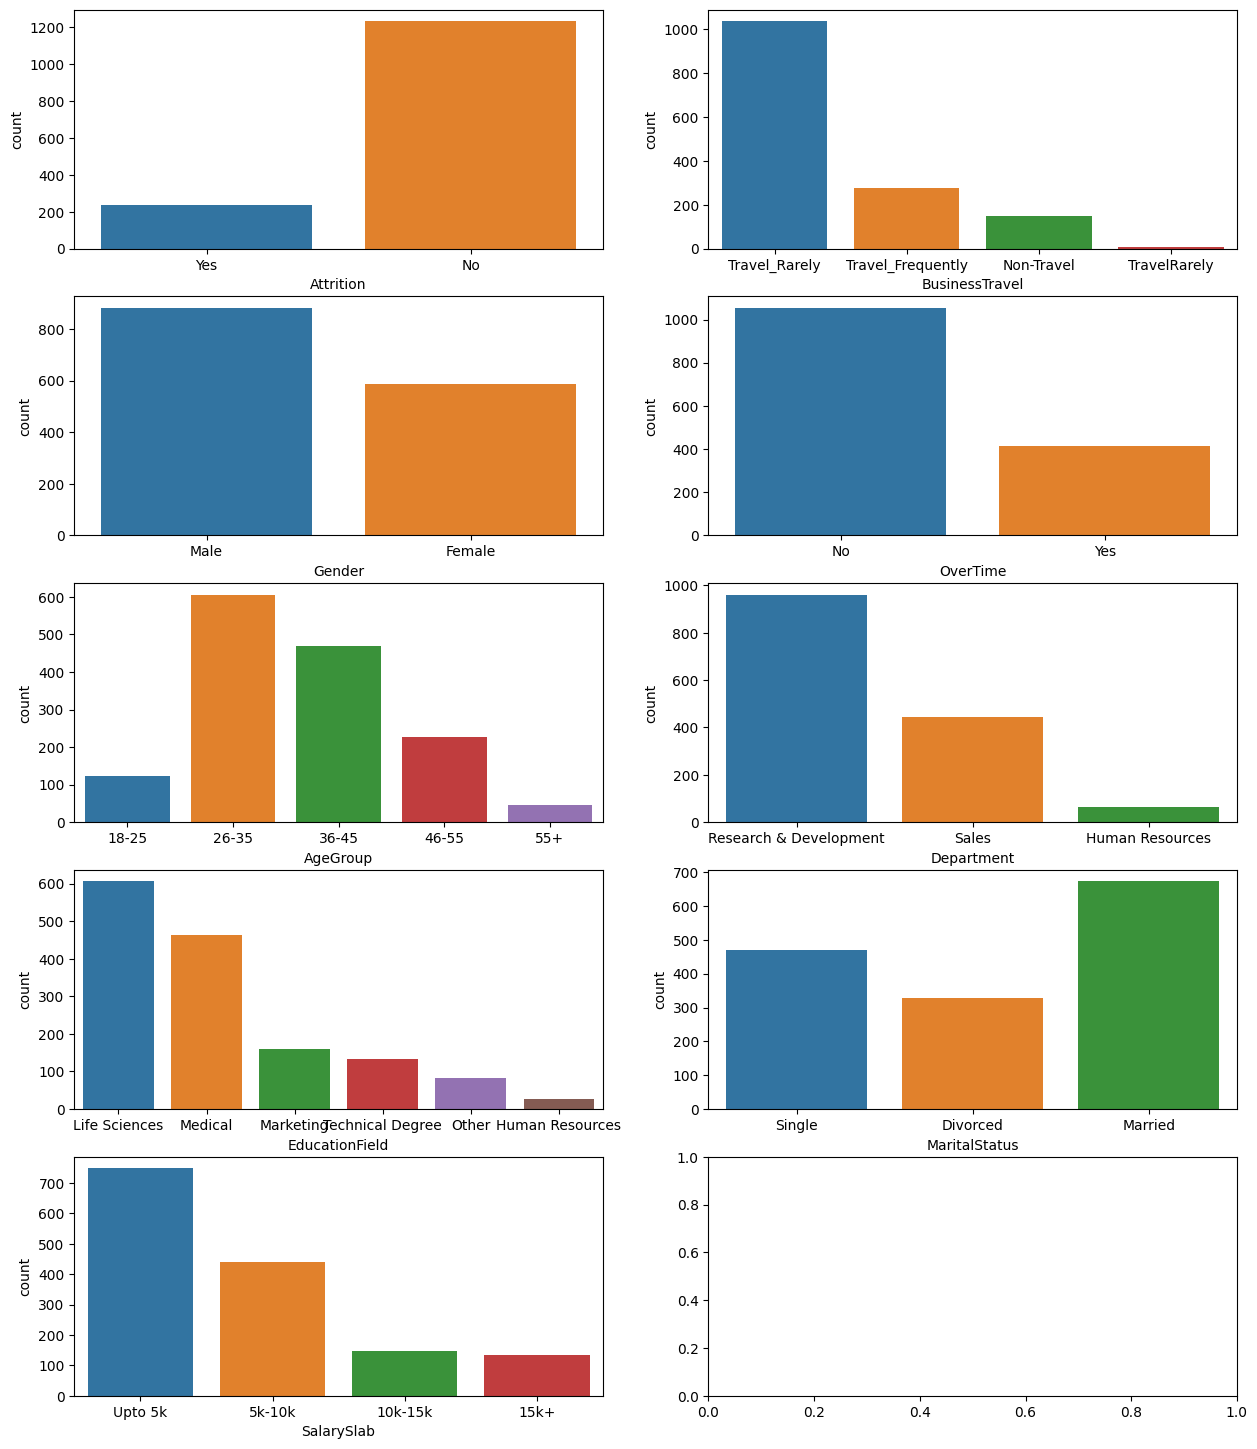

In [9]:
countplot_df = df[['Attrition','BusinessTravel','Gender','OverTime','AgeGroup','Department','EducationField','MaritalStatus','SalarySlab']] # isolating some categorical fields for countplot subplots

fig , ax = plt.subplots(5,2,figsize = (15,18)) # set the frame size and figsize for the subplots
for i , subplots in zip (countplot_df, ax.flatten()): # iterate through categorical fields and frames as a flattened axis
  sns.countplot(x=countplot_df[i],ax = subplots) # generate countplots for each field
plt.show()

[Text(0, 0, 'Laboratory Technician'),
 Text(1, 0, 'Sales Representative'),
 Text(2, 0, 'Research Scientist'),
 Text(3, 0, 'Human Resources'),
 Text(4, 0, 'Manufacturing Director'),
 Text(5, 0, 'Sales Executive'),
 Text(6, 0, 'Healthcare Representative'),
 Text(7, 0, 'Research Director'),
 Text(8, 0, 'Manager')]

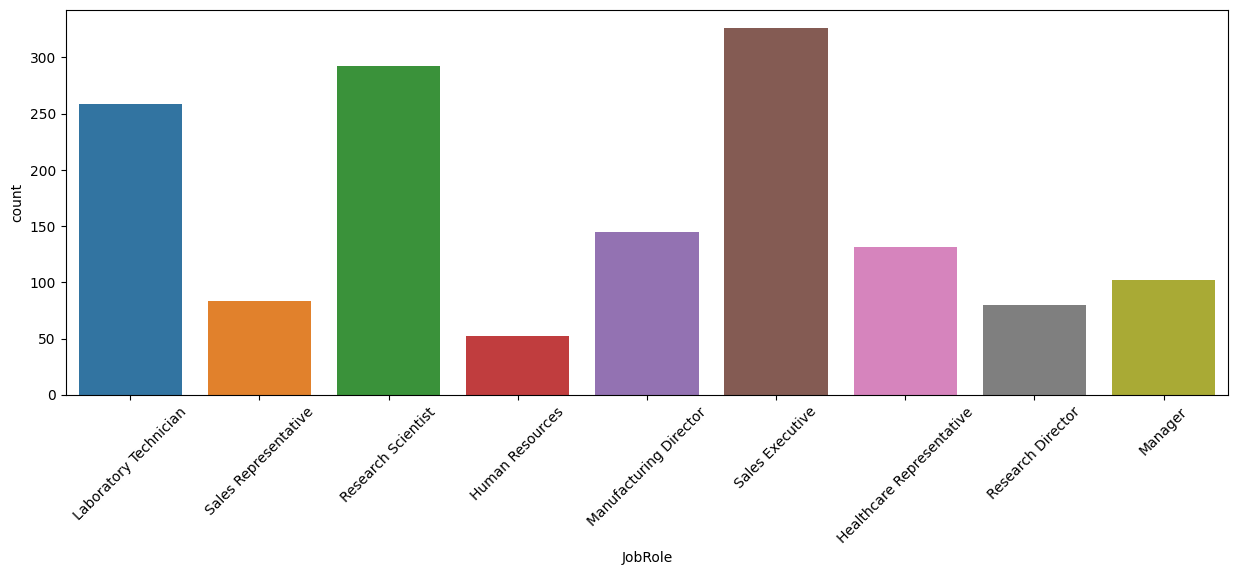

In [10]:
plt.figure(figsize = (15,5))
chart = sns.countplot(x=df['JobRole']) # generate separate countplot for JobRole, as it has more categories
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

`Attrition` and `OverTime` are binary Yes/No values, so we can confidently change these to 0 and 1 values and include them with the other numerical features.   

Similarly `BusinessTravel` - whilst it has more categories - comes with a sense of scale from zero to frequent travel, so this can also be made numeric.  There is a typo in some entries for this field, though, so we will need to clean this up before we proceed with any kind of machine learning model.

In [11]:
df = df.replace({'BusinessTravel' : 'TravelRarely'},'Travel_Rarely') # replacing the less common wording with the more common one
df['BusinessTravel'].value_counts() # counting resulting values to check consistency in altered df


BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

In [12]:
df = df.replace({'Attrition' : {'Yes': 1, 'No': 0}, 'OverTime' : {'Yes': 1, 'No': 0}}) # replacing Yes/No with 1 and 0
df = df.replace({'BusinessTravel' : {'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently' : 2}}) # replacing Yes/No with 1 and 0

I will add the remaining categorical fields to their own dataframe, ready for use later on

In [ ]:
categorical_df = df[['AgeGroup','Department','EducationField','Gender','JobRole','MaritalStatus','SalarySlab']]
categorical_df.head()

Now to take a look at our numerical fields and see if any clear correlations exist that might help us better understand our fields with numerical scales, or else might help us to refine a model prediction attrition...

<Axes: >

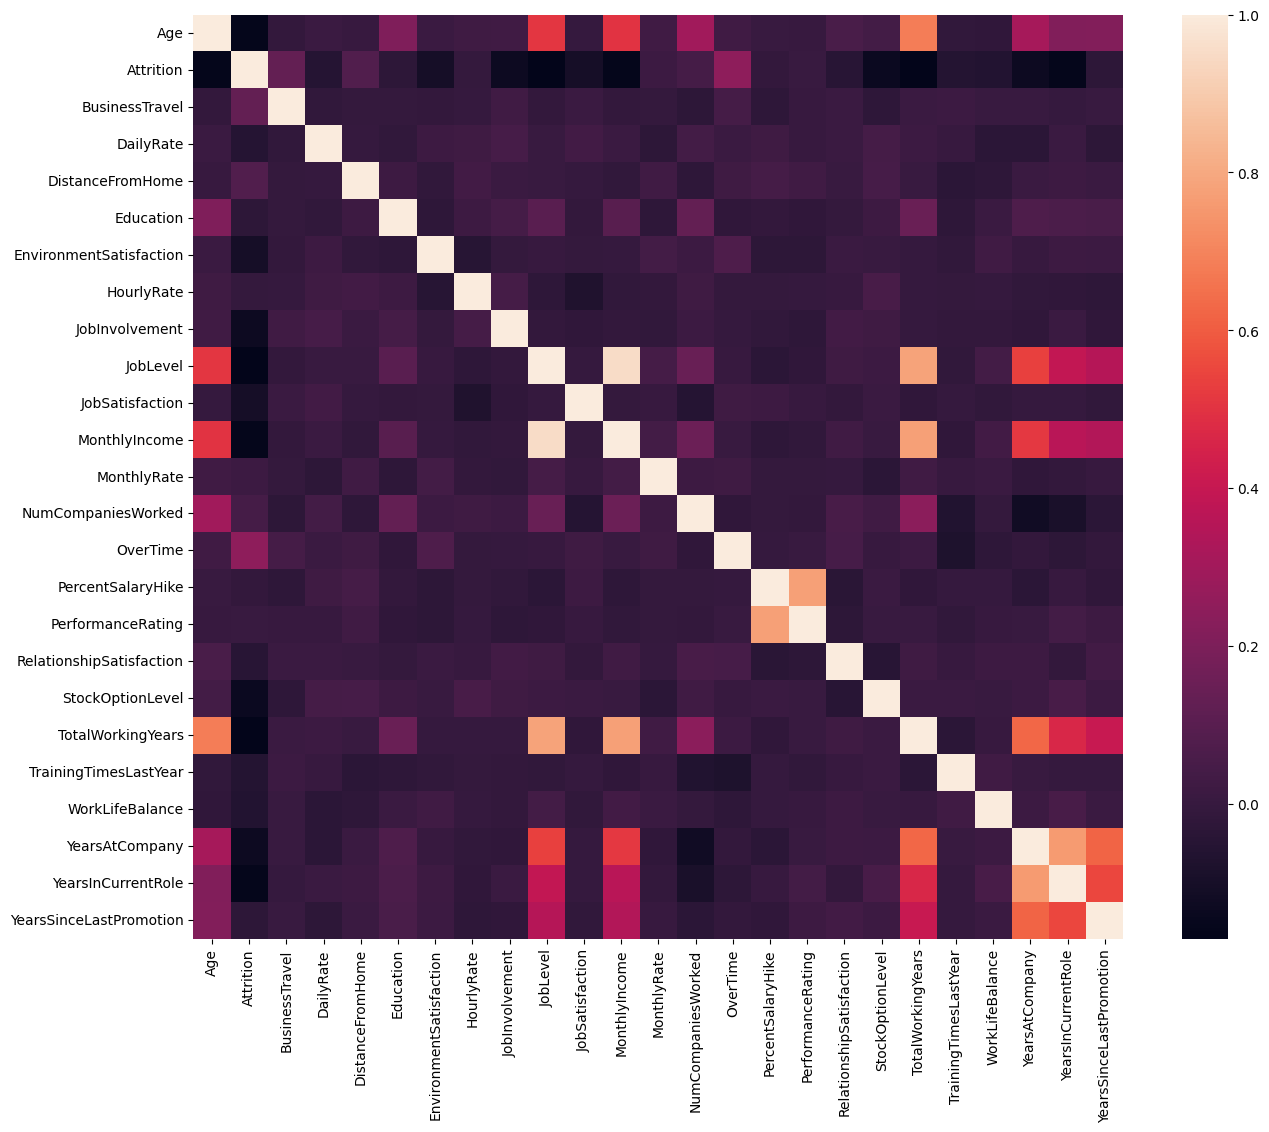

In [13]:
numerical_df = df.select_dtypes(include=np.number) 
# creating a dataframe for only numerical fields for heatmap analysis
numerical_df = numerical_df.drop(['EmployeeNumber','EmployeeCount'], axis=1) 
# dropping EmployeeNumber and EmployeeCount columns, as they don't provide any insight from a heatmap perspective

fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(numerical_df.corr())

Sadly for us, correlation between `Attrition` and individual features in the data set is very low.  The highest correlation we see is to `OverTime`, which does make sense, but even that probably isn't strong enough for reliable predictions.

Our prediction model is going to need to make predictions based on patterns between all features in the data set to be most effective.

In terms of better understanding features that are on a scale, from the heatmap we can see that for `JobLevel` the strongest correlation is `MonthlyIncome`.  If we plot these two variables against each other we can see this relationship and confidently infer that 1 is the lowest job level, and 5 is the highest job level

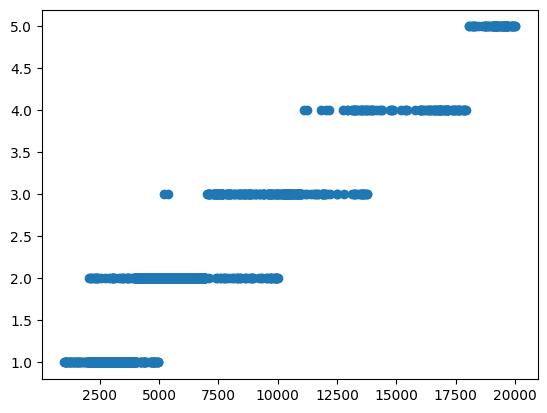

In [14]:
plt.scatter(df['MonthlyIncome'], df['JobLevel']) # plotting MonthlyIncome against JobLevel

Similarly, plotting `PercentSalaryHike` against `PerformanceRating` shows a clear threshold for salary increases based on performance rating, even though the data set actually only contains two performance ratings - 3 and 4.

Given that there are only two values available for performance rating, and that these are both ratings that aquired salary increases, this data set is really well set up to answer questions around retaining high performers

It might actually be a good idea for us to drop `PerformanceRating` from the data set, so that the low variance of values that only signify positive outcomes for the employee don't skew the model.

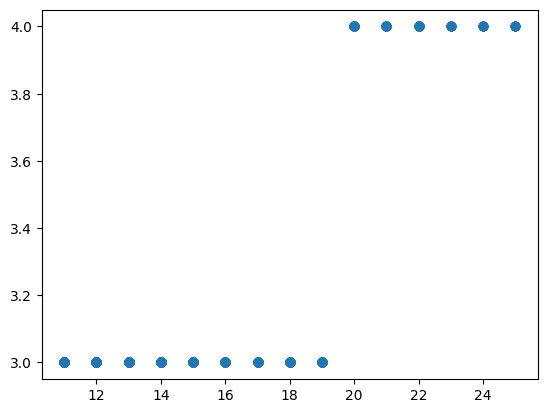

In [15]:
plt.scatter(df['PercentSalaryHike'], df['PerformanceRating']) # plotting PercentSalaryHike against PerformanceRating

In [ ]:
# Continue working from here.  Use the numerical and categorical dfs to Create a baseline estimator

In [16]:
numerical_pipeline = make_pipeline(numerical_df, HistGradientBoostingRegressor(random_state=17))

In [ ]:
# code below can be ignored for now.  Bring it back into play if it helps.

The last two categorical fields are `Department` and `JobRole` which implies a hierarchy that I will need to explore

In [ ]:
fig = px.treemap(df, path=['Department','JobRole','JobLevel'], values='EmployeeCount') # hierarchichal order to plot and method of aggregation
fig.update_layout(margin = dict(t=25, l=25, r=25, b=25)) # adjusting margins to reduce whitespace
fig.show()

The treemap shows that there are 11 possible combinations of department and job role, and supplementary to our previous analysis about the direction of the job level scale, it also suggests that there are some restrictions around the job levels that can occur for each role.

For example, manager/director roles have no roles ranked 1, and of all the director roles, only `Manufacturing Director` has employees ranked at 2.

One might suggest that a latent cause for this could linked to performance ratings and promotions, but our data set only captures top performers, and we still see only 1 and 2 ranks for many roles.

In [ ]:
managers = df[['Department','JobRole','JobLevel','EmployeeCount']]
managers = managers[managers['JobRole'] == 'Manager']
managers.groupby(['Department','JobRole','JobLevel']).sum()['EmployeeCount']

In addition, it appears from the aggregated table above that we cannot take for granted that all manager roles are created equally across all departments, so in order to avoid skewing any analysis, I will concatenate the `Department` and `JobRole` fields so that any `JobLevel` values in my training data relate to the more specific role definition, rather than managers generally.

In [ ]:
df['Role'] = df['Department'] + " - " + df['JobRole']
df = df.drop(['Department','JobRole'], axis=1)
df.head()